In [11]:
!pip install kaggle
!pip install matplotlib

In [12]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d olgabelitskaya/flower-color-images

cp: -r not specified; omitting directory 'kaggle.json'
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [14]:
!unzip flower-color-images.zip

Archive:  flower-color-images.zip
   creating: Flower Color Images Dataset/flower_images/
   creating: Flower Color Images Dataset/flower_images/flower_images/
  inflating: Flower Color Images Dataset/flower_images/flower_images/0001.png  
  inflating: Flower Color Images Dataset/flower_images/flower_images/0002.png  
  inflating: Flower Color Images Dataset/flower_images/flower_images/0003.png  
  inflating: Flower Color Images Dataset/flower_images/flower_images/0004.png  
  inflating: Flower Color Images Dataset/flower_images/flower_images/0005.png  
  inflating: Flower Color Images Dataset/flower_images/flower_images/0006.png  
  inflating: Flower Color Images Dataset/flower_images/flower_images/0007.png  
  inflating: Flower Color Images Dataset/flower_images/flower_images/0008.png  
  inflating: Flower Color Images Dataset/flower_images/flower_images/0009.png  
  inflating: Flower Color Images Dataset/flower_images/flower_images/0010.png  
  inflating: Flower Color Images Dataset

In [15]:
import numpy as np
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
import os

In [16]:
from scipy.ndimage import rotate
def rotate_image_30_degrees(image):
  return rotate(image, 30, reshape=False, mode='nearest')


def vertical_flip(image):
  return rotate(image, 180, reshape=False, mode='nearest')


import cv2

def flip_image(image, mode='horizontal'):

    if mode == 'horizontal':
        flipped_image = cv2.flip(image, 1)
    elif mode == 'vertical':
        flipped_image = cv2.flip(image, 0)
    else:
        raise ValueError("Invalid mode. Mode must be 'horizontal' or 'vertical'.")

    return flipped_image




from PIL import ImageEnhance, Image
import numpy as np

def adjust_contrast(image):
   pil_img = Image.fromarray((image * 255).astype(np.uint8))
   contrast = ImageEnhance.Contrast(pil_img)
   pil_img_enhanced = contrast.enhance(2.0)

   return np.array(pil_img_enhanced) / 255.0

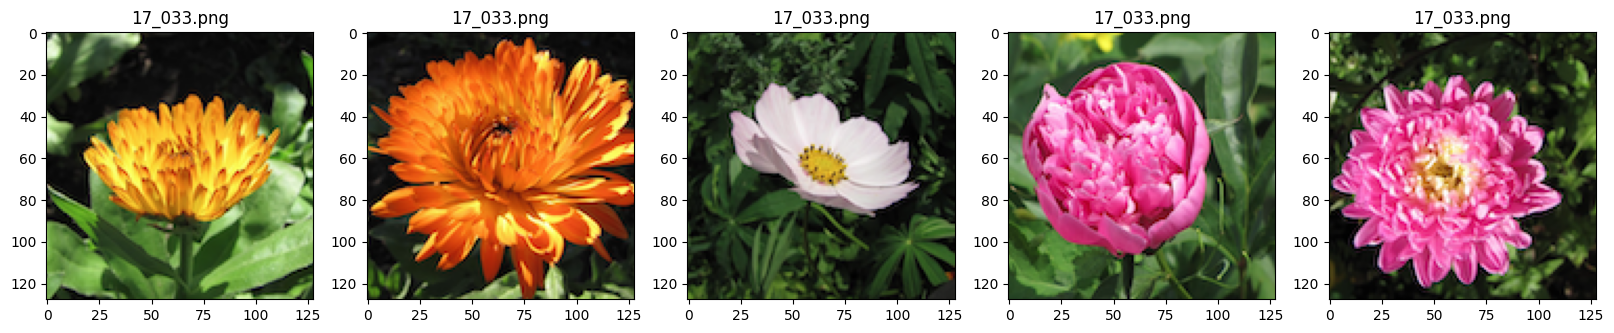

In [17]:
list_img = []
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir('/content/Flower Color Images Dataset/flowers/flowers'))
    image_path = os.path.join('/content/Flower Color Images Dataset/flowers/flowers', file)
    img=mpimg.imread(image_path)
    list_img.append(img)

for i, img in enumerate(list_img):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

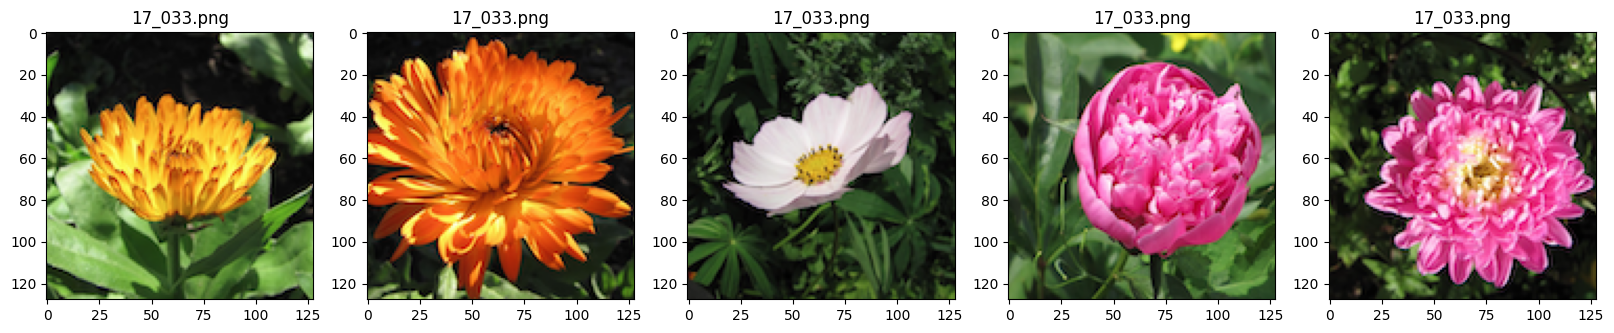

In [18]:
horizontal_flip_list = []
plt.figure(figsize=(20,20))
for img in list_img:
    horizontal_flip_list.append(flip_image(img, mode='horizontal'))

for i, img in enumerate(horizontal_flip_list):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

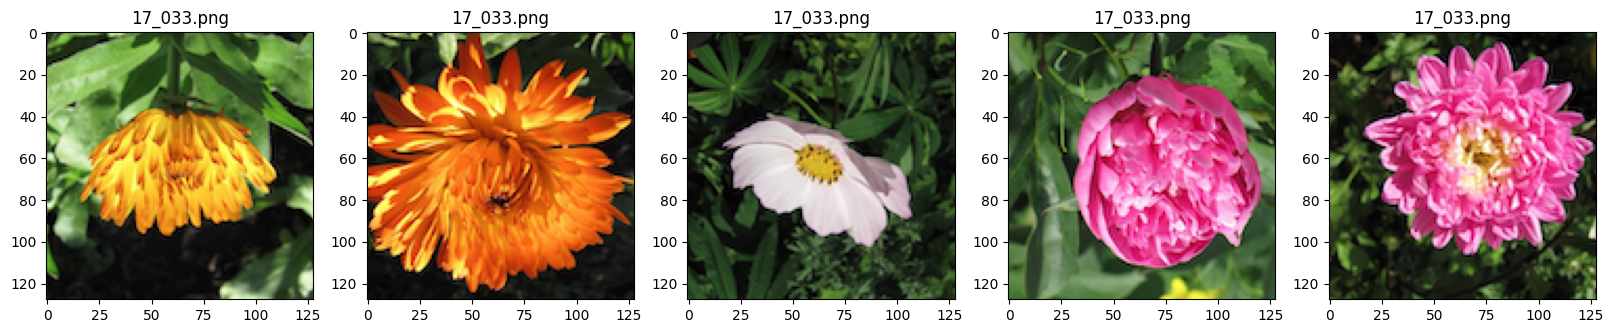

In [19]:
vertical_flip_list = []
plt.figure(figsize=(20,20))
for img in list_img:
  vertical_flip_list.append(vertical_flip(img))

for i, img in enumerate(vertical_flip_list):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)